<a href="https://colab.research.google.com/github/pedrofratassi/da-um-aumento/blob/main/TitanicIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Bibliotecas utilizadas
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)

In [ ]:
#Carregando os dados no data frame Os dados usualmente lida com os dados separados por virgula (Arquivos CSV)
df = pd.read_csv('https://raw.githubusercontent.com/EdgarNoda/INTI6-2024/main/datasets/Titanic/train.csv')
df.head(5)
#df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Verificando os tipos de dados
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [ ]:
# Verificando os dados nulos
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2
Family,0


In [ ]:
# Eliminando os dados nulos da tabela Embarked, visto que são passageiros que estão ausentes
df = df.dropna(subset=['Embarked'])

In [ ]:
# Verificando os dados nulos de Embarked
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,0
Family,0


In [ ]:
# Eliminando dados menos relevantes
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [ ]:
# Visualizando que agora não as tabalas de daddos eliminados anteriormente
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
# Unindo dois dados (SibSp & Parch) para formar o dados de família
df['Family'] = df['SibSp'] + df['Parch']

In [ ]:
# Visualizando a nova junção de dados feitos anteriormente
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


In [ ]:
# Atualizando a tabela de visualização para ter somente as tabelas Survived, Pclass, Sex, Age, Fare, Embarked, Family
df.loc[:, ['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Family']].head(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [ ]:
# Preenche os valores ausentes na coluna 'Age' com a mediana da coluna 'Age'
df['Age'].fillna(df['Age'].median(), inplace=True)

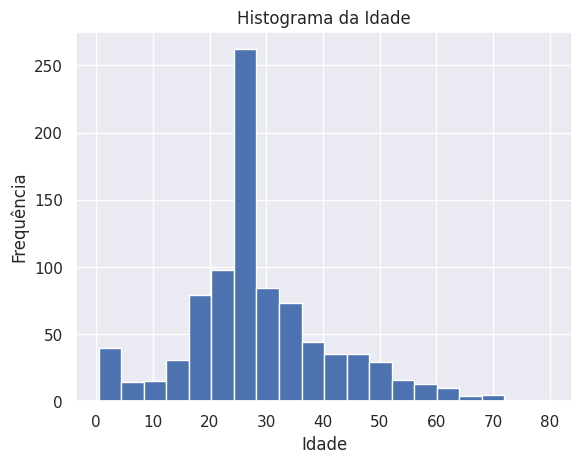

In [ ]:
# Gráfico de Histograma para idade
plt.hist(df['Age'], bins=20)
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Histograma da Idade')
plt.show()

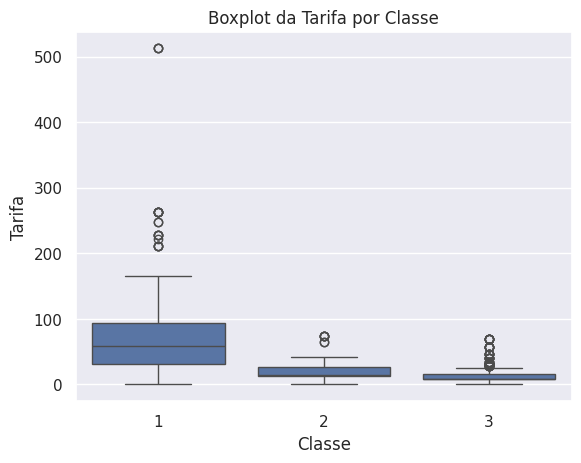

In [ ]:
# Gráfico Boxplot para a tarifa por classe
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.xlabel('Classe')
plt.ylabel('Tarifa')
plt.title('Boxplot da Tarifa por Classe')
plt.show()

In [ ]:
# Criando uma matriz de correlação para visualizar as relações entre as variáveis
correlation_matrix = df.corr()

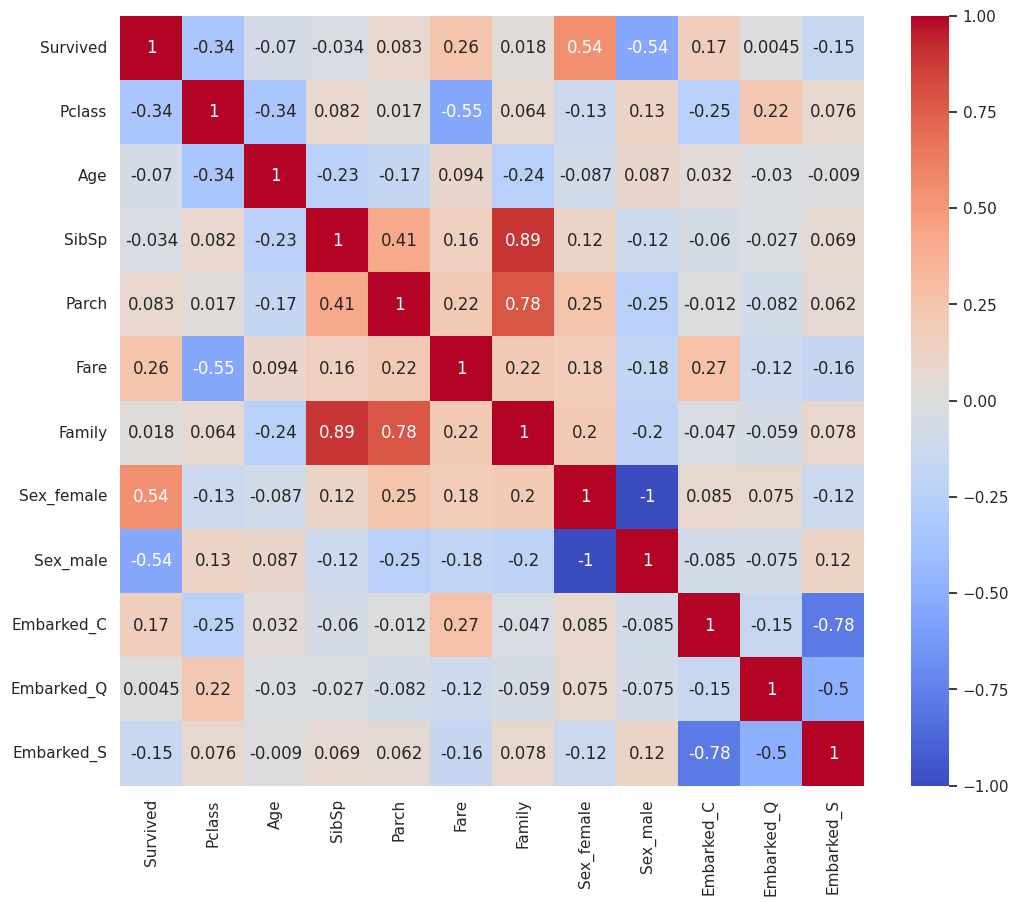

In [ ]:
# Criando um mapa de calor da matriz de correlação
plt.figure(figsize=(12, 10)) # Ajustando o tamanho da figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm') # Mapa de cores 'coolwarm' e inclusão de anotações
plt.show()

In [ ]:
df.to_csv('titanic_adjusted.csv', index=False)